#### About this project

Airbnb became one of a kind service that is used and recognized by the whole world. Both guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world.

Data analysis and Machine Learning has become a big part of Airbnb's business model, ensuring that the hosts are getting the right price for their listing while the guests are likely to experience different parts of the world while travelling on a budget. 

All the listings on this platform generate a lot of data. This data can be analysed and used for security, business decisions, understanding the needs of the market and furthering the goal of becoming a global phenomena that is growing exponentially with its pool of users.

In this project, a team of three students from KEA - Copenhagen School of Design and Technology wants to recreate the smart pricing algorithm that has, in part, brought fame to Airbnb. We will be analysing the listings from New York City, US.

#### About the data

This dataset has around 40,000 observations in it with 29 columns and it is a mix between categorical and numeric values.

The data comes from a bigger dataset with approximately 400000 observations that can be used in the future to prove/disprove our model. Out of the total 70+ columns, we have focused on the most relevant ones referring to the base price, location, amenities and review score.

In addition to that, the team will be augumenting the dataset with several features, such as the points of interest (labeled simply poi) that are in the near proximity of a listing, the crime rate per borough/neighbourhood and the average salary per citizen per year per borough.

To ensure that our ML algorithm will perform at its best, the group will one-hot-encode several features such as room type, borough, amenities and others.

#### Research Question: 
Does the price of an airbnb listing fluctuates based on different features such as crime rate, poi in the near proximity, population density, amenities and other attributes of a listing?

Sub-Questions:
1. Is crime rate a detrimental factor in determining the price of a listing?
2. Do prices of listings that are near more points of interest grow?
3. Can reviews influence the price of a listing?
4. Can a ML model be created that predicts the price of a listing from NYC, similar to the one that airbnb has?

#### About this notebook

In this notebook the team will analyse and clean the data, making it suited for the machine learning part.

We want to create structured process so that this project can be used as a refference in the future. The repository which contains this notebook as well as the visualization and machine learning ones can be found here.

https://github.com/bgz10/DS_MS2_NYC

*** If you like what you see, give us a star on github.


In [1]:
#importing necessery libraries for future analysis of the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the dataset

pd.set_option('display.max_columns', 500)
airbnb_full = pd.read_csv('../Data/airbnb-listings2.csv', sep=';')
airbnb_full.head(2)

/Users/_bogz_/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,2,27,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID                            Listing Url       Scrape ID  \
0  16590973  https://www.airbnb.com/rooms/16590973  20170402075052   
1  17654056  https://www.airbnb.com/rooms/17654056  20170402075052   

  Last Scraped                                Name  \
0   2017-04-02   Trendy apartment, near Vondelpark   
1   2017-04-02  Cozy apartment in lively Amsterdam   

                                             Summary  \
0  This lovely newly renovated apartment on the 2...   
1  My cozy 2 bedroom apartment is located in the ...   

                                               Space  \
0  It is situated in a quiet street. The apartmen...   
1                                                NaN   

                                         Description Experiences Offered  \
0  This lovely newly renovated apartment on the 2...                none   
1  My cozy 2 bedroom apartment is located in the ...                none   

                               Neighborhood Overview  \
0  'Oud West' is full of nice surprises.  Within ...   
1                                                NaN   

                                               Notes  \
0  There's no elevator. Hall way is under constru...   
1                                                NaN   

                                             Transit  \
0  The tram is close by, line 1, 7 and 17. They w...   
1  In less then 5 minutes you will find public tr...   

                                        Access  \
0  You will have acces to the whole apartment.   
1                                          NaN   

                                         Interaction  \
0  You can always contact us for advice, tips and...   
1                                                NaN   

                                         House Rules  \
0  House Rules: We expect guests to treat our hou...   
1                                                NaN   

                                       Thumbnail Url  \
0  https://a0.muscache.com/im/pictures/e644cfe1-4...   
1  https://a0.muscache.com/im/pictures/2c07f2fa-c...   

                                          Medium Url  \
0  https://a0.muscache.com/im/pictures/e644cfe1-4...   
1  https://a0.muscache.com/im/pictures/2c07f2fa-c...   

                                         Picture Url  \
0  https://public.opendatasoft.com/api/v2/catalog...   
1  https://public.opendatasoft.com/api/v2/catalog...   

                                      XL Picture Url   Host ID  \
0  https://a0.muscache.com/im/pictures/e644cfe1-4...  12749039   
1  https://a0.muscache.com/im/pictures/2c07f2fa-c...  18293508   

                                     Host URL Host Name  Host Since  \
0  https://www.airbnb.com/users/show/12749039    Sheryl  2014-03-03   
1  https://www.airbnb.com/users/show/18293508     Fleur  2014-07-17   

                           Host Location Host About  Host Response Time  \
0  Amsterdam, North Holland, Netherlands        NaN      within an hour   
1  Amsterdam, North Holland, Netherlands        NaN  within a few hours   

   Host Response Rate Host Acceptance Rate  \
0               100.0                  NaN   
1               100.0                  NaN   

                                  Host Thumbnail Url  \
0  https://a0.muscache.com/im/users/12749039/prof...   
1  https://a0.muscache.com/im/users/18293508/prof...   

                                    Host Picture Url Host Neighbourhood  \
0  https://a0.muscache.com/im/users/12749039/prof...                NaN   
1  https://a0.muscache.com/im/users/18293508/prof...                NaN   

   Host Listings Count  Host Total Listings Count  \
0                  1.0                        1.0   
1                  1.0                        1.0   

                                  Host Verifications  \
0                                email,phone,reviews   
1  email,phone,facebook,reviews,jumio,offline_gov...   

                                         Street Neighbourhood  

In [3]:
#getting the new york market only

airbnb = airbnb_full.loc[airbnb_full['Market'] == 'New York']
airbnb = airbnb[airbnb['Neighbourhood Group Cleansed'] !='Mitte']
airbnb.head(2)

ID                            Listing Url       Scrape ID  \
6691    633276    https://www.airbnb.com/rooms/633276  20170502132028   
6692  17285980  https://www.airbnb.com/rooms/17285980  20170502132028   

     Last Scraped                                               Name  \
6691   2017-05-04                Jacuzzi Suite, minutes to Times Sq.   
6692   2017-05-05  Private 1br in quiet Long Island City neighbor...   

                                                Summary  \
6691  We encourage you to please message us BEFORE m...   
6692  This is a 1 bedroom/1 bathroom, 3nd floor apar...   

                                                  Space  \
6691  General info and location: This cozy and brigh...   
6692  This apartment is great for people looking for...   

                                            Description Experiences Offered  \
6691  We encourage you to please message us BEFORE m...                none   
6692  This is a 1 bedroom/1 bathroom, 3nd floor apar...                none   

                                  Neighborhood Overview  \
6691  We have lived in many neighborhoods in NYC ove...   
6692  Quiet neighborhood of nice families. The owner...   

                                                  Notes  \
6691  Our son was born in July of 2016, so he is lik...   
6692  Smoking is not allowed in the building, but yo...   

                                                Transit  \
6691  We are across the street from the 7 subway lin...   
6692  Walking distance to lovely Greenpoint (15min),...   

                                                 Access  \
6691  The house: This is an historic townhouse from ...   
6692  Entire use of the apartment is available. Eat ...   

                                            Interaction  \
6691  We are normally available to introduce you to ...   
6692  I'll be available to answer questions about th...   

                                            House Rules  \
6691  This is a non-smoking home and a shoe-free hom...   
6692                                                NaN   

                                          Thumbnail Url  \
6691  https://a0.muscache.com/im/pictures/64773394/c...   
6692  https://a0.muscache.com/im/pictures/8766701e-6...   

                                             Medium Url  \
6691  https://a0.muscache.com/im/pictures/64773394/c...   
6692  https://a0.muscache.com/im/pictures/8766701e-6...   

                                            Picture Url  \
6691  https://public.opendatasoft.com/api/v2/catalog...   
6692  https://public.opendatasoft.com/api/v2/catalog...   

                                         XL Picture Url  Host ID  \
6691  https://a0.muscache.com/im/pictures/64773394/c...  1568517   
6692  https://a0.muscache.com/im/pictures/8766701e-6...  3482065   

                                       Host URL         Host Name  Host Since  \
6691  https://www.airbnb.com/users/show/1568517  Karl & Catherine  2012-01-04   
6692  https://www.airbnb.com/users/show/3482065              Joel  2012-09-05   

                          Host Location  \
6691  New York, New York, United States   
6692  New York, New York, United States   

                                             Host About  Host Response Time  \
6691  We are 15 year NYC residents, filmmakers, acto...  within a few hours   
6692  Traveling professional engineer exploring the ...        within a day   

      Host Response Rate Host Acceptance Rate  \
6691               100.0                  NaN   
6692                80.0                  NaN   

                                     Host Thumbnail Url  \
6691  https://a0.muscache.com/im/pictures/06703589-2...   
6692  https://a0.muscache.com/im/users/3482065/profi...   

                                       Host Picture Url Host Neighbourhood  \
6691  https://a0.muscache.com/im/pictures/06703589-2...   Long Island City   
6692  https://a0.muscache.com/im/users/3482065/profi...          Sunnyside   

 

In [4]:
airbnb['Neighbourhood Group Cleansed'].value_counts()


Manhattan        19116
Brooklyn         16741
Queens            3779
Bronx              647
Staten Island      261
Name: Neighbourhood Group Cleansed, dtype: int64

In [5]:
# selecting only the needed columns

df_airbnb = airbnb[['ID', 'Name','Latitude', 'Longitude', 'Price','Security Deposit', 'Cleaning Fee',
         'Host Response Time','Host Response Rate', 'Host Total Listings Count','Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
         'Street', 'Property Type','Room Type','Accommodates','Bathrooms','Bedrooms','Beds','Amenities',
         'Number of Reviews',  'Reviews per Month','Review Scores Rating',
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 
         'Review Scores Location', 'Review Scores Value']]

In [6]:
# saving the dataset for later use

df_airbnb.to_csv('../Data/airbnb_nyc_uncleaned.csv', sep=',' , index = None, header=True)

### Start here! The previous lines are just pre-processing from a dataset of 2GB

In [1]:
#importing necessery libraries for future analysis of the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
df_airbnb = pd.read_csv('../Data/airbnb_nyc_uncleaned.csv')

#examining the head of the dataset
df_airbnb.head(5)

ID                                               Name   Latitude  \
0    633276                Jacuzzi Suite, minutes to Times Sq.  40.746086   
1  17285980  Private 1br in quiet Long Island City neighbor...  40.734965   
2  17938814    Beautiful spacious one bedroom, upper east side  40.746234   
3  12762161                 Garden PentHouse 8Min to Manhattan  40.753186   
4   9759331                 2BD located 1 stop from Manhattan!  40.747142   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Time  \
0 -73.946906  108.0             400.0          49.0  within a few hours   
1 -73.935211   80.0             300.0          15.0        within a day   
2 -73.956953  115.0               NaN           NaN      within an hour   
3 -73.933830  395.0             500.0         150.0        within a day   
4 -73.950003   55.0             100.0          40.0                 NaN   

   Host Response Rate  Host Total Listings Count  ...  \
0               100.0                        2.0  ...   
1                80.0                        1.0  ...   
2               100.0                        1.0  ...   
3                90.0                        1.0  ...   
4                 NaN                        1.0  ...   

                                           Amenities Number of Reviews  \
0  TV,Internet,Wireless Internet,Air conditioning...              89.0   
1  Wireless Internet,Air conditioning,Kitchen,Hea...               1.0   
2  TV,Cable TV,Wireless Internet,Kitchen,Smoking ...               3.0   
3  Internet,Wireless Internet,Air conditioning,Ki...              24.0   
4  TV,Internet,Wireless Internet,Kitchen,Buzzer/w...               1.0   

  Reviews per Month Review Scores Rating Review Scores Accuracy  \
0              1.58                 94.0                   10.0   
1              0.38                  NaN                    NaN   
2              3.00                100.0                    9.0   
3              2.38                 92.0                   10.0   
4              0.06                100.0                   10.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        9.0                   10.0   
1                        NaN                    NaN   
2                        9.0                    9.0   
3                       10.0                    9.0   
4                       10.0                   10.0   

   Review Scores Communication  Review Scores Location Review Scores Value  
0                         10.0                     9.0                 9.0  
1                          NaN                     NaN                 NaN  
2                          9.0                    10.0                10.0  
3                         10.0                     9.0                 9.0  
4                         10.0                    10.0                10.0  

[5 rows x 29 columns]

In [3]:
# Assessing the length of the dataset

len(df_airbnb)

40551

In [4]:
# And the types of features that we have to work with

df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40551 entries, 0 to 40550
Data columns (total 29 columns):
ID                              40551 non-null int64
Name                            40516 non-null object
Latitude                        40551 non-null float64
Longitude                       40551 non-null float64
Price                           40352 non-null float64
Security Deposit                16510 non-null float64
Cleaning Fee                    27915 non-null float64
Host Response Time              27478 non-null object
Host Response Rate              27478 non-null float64
Host Total Listings Count       40301 non-null float64
Neighbourhood Cleansed          40551 non-null object
Neighbourhood Group Cleansed    40544 non-null object
Street                          40551 non-null object
Property Type                   40551 non-null object
Room Type                       40551 non-null object
Accommodates                    40551 non-null float64
Bathrooms           

##### Observations:
After loading the dataset, we can observe that it contains 29 columns, rich in data and well suited for a more thorough analysis.

There are some NaN values that will need to be replaced and as previously stated, this dataset will be augumented by adding more features and one-hot-encoding others.

#### Step 1: 

Dealing with NaN values.

In [5]:
df_airbnb.isnull().sum()

ID                                  0
Name                               35
Latitude                            0
Longitude                           0
Price                             199
Security Deposit                24041
Cleaning Fee                    12636
Host Response Time              13073
Host Response Rate              13073
Host Total Listings Count         250
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed        7
Street                              0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                         158
Bedrooms                           69
Beds                               78
Amenities                         280
Number of Reviews                   0
Reviews per Month                9217
Review Scores Rating             9838
Review Scores Accuracy           9930
Review Scores Cleanliness        9899
Review Scores Checkin            9949
Review Score

##### Observations:

- There are 199 observations that do not a have a price we will drop them for now. We could predict a price for the model but we can also do that later on.
- The street is too focalised to influence the dataset and hence will be dropped.
- The rest of the NaN values will be simply replaced with 0 or '' as we are talking about review scores which may or may not be there based on how many times a listing has been booked.
- There are 7 records that do not have a borough attached to them. They will be dropped
- We are assuming that all the listings that do not have a specified amount of beds actually have 1 bed same for bathrooms.
- Missing bedrooms numbers will be replaced with 0 as some people rent living rooms or dens.
- Missing host total listing counts will be interpreted as 1.

In [6]:
df_airbnb.drop(['Street'], axis=1, inplace=True)

In [7]:
# Changing the NaNs to 0 for security deposit, cleaning fee, host response rate, amenities, and reviews fields

df_airbnb.fillna({'Name':'','Security Deposit':0, 'Cleaning Fee':0, 'Host Response Rate':0, 'Amenities':'',
               'Reviews per Month':0, 'Review Scores Rating':0, 'Review Scores Accuracy':0,
               'Review Scores Cleanliness':0, 'Review Scores Checkin':0, 'Review Scores Communication':0,
               'Review Scores Location':0, 'Review Scores Value':0, 'Host Total Listings Count': 1, 'Bathrooms': 1,
               'Bedrooms':0, 'Beds': 1, 'Host Response Time': 'not specified'}, inplace=True)

In [8]:
df_airbnb = df_airbnb.dropna(subset=['Neighbourhood Group Cleansed'])
df_airbnb = df_airbnb.dropna(subset=['Price'])

In [9]:
df_airbnb.head(2)

ID                                               Name   Latitude  \
0    633276                Jacuzzi Suite, minutes to Times Sq.  40.746086   
1  17285980  Private 1br in quiet Long Island City neighbor...  40.734965   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Time  \
0 -73.946906  108.0             400.0          49.0  within a few hours   
1 -73.935211   80.0             300.0          15.0        within a day   

   Host Response Rate  Host Total Listings Count  ...  \
0               100.0                        2.0  ...   
1                80.0                        1.0  ...   

                                           Amenities Number of Reviews  \
0  TV,Internet,Wireless Internet,Air conditioning...              89.0   
1  Wireless Internet,Air conditioning,Kitchen,Hea...               1.0   

  Reviews per Month Review Scores Rating  Review Scores Accuracy  \
0              1.58                 94.0                    10.0   
1              0.38                  0.0                     0.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        9.0                   10.0   
1                        0.0                    0.0   

   Review Scores Communication Review Scores Location  Review Scores Value  
0                         10.0                    9.0                  9.0  
1                          0.0                    0.0                  0.0  

[2 rows x 28 columns]

In [10]:
# Review related columns are either using scales from 1 to 10 or 1 to 100. We will be normalising them for now.
# If a strong correlation will be found between the reviews, they will be merged into one column.

# Dealing with the reviews columns. Converting them to percentages
df_airbnb['Review Scores Rating'] = df_airbnb['Review Scores Rating'] / 100
df_airbnb['Review Scores Accuracy'] = df_airbnb['Review Scores Accuracy'] / 10
df_airbnb['Review Scores Cleanliness'] = df_airbnb['Review Scores Cleanliness'] / 10
df_airbnb['Review Scores Checkin'] = df_airbnb['Review Scores Checkin'] / 10
df_airbnb['Review Scores Communication'] = df_airbnb['Review Scores Communication'] / 10
df_airbnb['Review Scores Location'] = df_airbnb['Review Scores Location'] / 10
df_airbnb['Review Scores Value'] = df_airbnb['Review Scores Value'] / 10

In [11]:
# Examining the boroughs

df_airbnb['Neighbourhood Group Cleansed'].unique()

array(['Queens', 'Bronx', 'Manhattan', 'Brooklyn', 'Staten Island'],
      dtype=object)

In [12]:
# And the neighbourhoods 

df_airbnb['Neighbourhood Cleansed'].unique()

array(['Long Island City', 'Longwood', 'Lower East Side', 'Midtown',
       'Kips Bay', 'Little Italy', 'Morrisania', 'Murray Hill', 'Midwood',
       'Norwood', 'Morris Heights', 'Maspeth', 'Middle Village',
       'Morningside Heights', 'NoHo', 'Nolita', 'Park Slope',
       'Port Morris', 'Port Richmond', 'Prospect Heights', 'Rosedale',
       'Schuylerville', 'Sheepshead Bay', 'South Ozone Park',
       'South Slope', 'Spuyten Duyvil', 'Red Hook', 'Rego Park',
       'Ridgewood', 'Rockaway Beach', 'Roosevelt Island', 'SoHo',
       'St. Albans', 'St. George', 'Stuyvesant Town', 'Sunnyside',
       'Sunset Park', "Hell's Kitchen", 'Greenwich Village', 'Harlem',
       'Hollis', 'Howard Beach', 'Inwood', 'East Harlem', 'East Village',
       'Downtown Brooklyn', 'East Elmhurst', 'East Flatbush', 'Edgemere',
       'Jamaica Estates', 'Financial District', 'Flatbush',
       'Flatiron District', 'Flatlands', 'Flushing', 'Greenpoint',
       'Jackson Heights', 'Jamaica', 'Emerson Hill',

In [13]:
# Checking the host response time values this will be processed later on...

df_airbnb['Host Response Time'].unique()

array(['within a few hours', 'within a day', 'within an hour',
       'not specified', 'a few days or more'], dtype=object)

In [14]:
# Checking the room types

df_airbnb['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
# Checking the property types types. This will be useful when augumenting our dataset

df_airbnb['Property Type'].unique()

array(['House', 'Apartment', 'Loft', 'Other', 'Condominium', 'Villa',
       'Townhouse', 'Bed & Breakfast', 'Serviced apartment', 'Timeshare',
       'Castle', 'Bungalow', 'Guesthouse', 'Hostel', 'Boat',
       'Boutique hotel', 'Dorm', 'Guest suite', 'Vacation home',
       'Lighthouse', 'Cabin', 'Chalet', 'Hut', 'Tent', 'Earth House',
       'Cave', 'In-law'], dtype=object)

In [16]:
# We can observe that there are some 'Unique experiences' property types. 
# But they are really few and most of them are either tents, boats, RV 
# or other types of properties which can actually be moved. 
# We are considering dropping those unique experiences listings.


un_stays = ['Barn', 'Boat', 'Camper/RV', 'Campsite', 'Casa particular (Cuba)', 
            'Castle', 'Houseboat', 'Island', 'Tent', 'Tiny house']

seriesObj = df_airbnb.apply(lambda x: True if x['Property Type'] in un_stays else False, axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
 
print('Number of Rows in dataframe which contain 11 in any column : ', numOfRows)


Number of Rows in dataframe which contain 11 in any column :  9


In [17]:
for i in un_stays:
    df_airbnb = df_airbnb[df_airbnb['Property Type'] != i]


In [18]:
df_airbnb['Property Type'].unique()

array(['House', 'Apartment', 'Loft', 'Other', 'Condominium', 'Villa',
       'Townhouse', 'Bed & Breakfast', 'Serviced apartment', 'Timeshare',
       'Bungalow', 'Guesthouse', 'Hostel', 'Boutique hotel', 'Dorm',
       'Guest suite', 'Vacation home', 'Lighthouse', 'Cabin', 'Chalet',
       'Hut', 'Earth House', 'Cave', 'In-law'], dtype=object)

In [24]:
df_airbnb.head(3)

ID                                               Name   Latitude  \
0    633276                Jacuzzi Suite, minutes to Times Sq.  40.746086   
1  17285980  Private 1br in quiet Long Island City neighbor...  40.734965   
2  17938814    Beautiful spacious one bedroom, upper east side  40.746234   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Time  \
0 -73.946906  108.0             400.0          49.0  within a few hours   
1 -73.935211   80.0             300.0          15.0        within a day   
2 -73.956953  115.0               0.0           0.0      within an hour   

   Host Response Rate  Host Total Listings Count Neighbourhood Cleansed  \
0               100.0                        2.0       Long Island City   
1                80.0                        1.0       Long Island City   
2               100.0                        1.0       Long Island City   

  Neighbourhood Group Cleansed Property Type        Room Type  Accommodates  \
0                       Queens         House     Private room           2.0   
1                       Queens     Apartment  Entire home/apt           3.0   
2                       Queens     Apartment  Entire home/apt           3.0   

   Bathrooms  Bedrooms  Beds  \
0        1.0       1.0   1.0   
1        1.0       1.0   1.0   
2        1.0       1.0   2.0   

                                           Amenities  Number of Reviews  \
0  TV,Internet,Wireless Internet,Air conditioning...               89.0   
1  Wireless Internet,Air conditioning,Kitchen,Hea...                1.0   
2  TV,Cable TV,Wireless Internet,Kitchen,Smoking ...                3.0   

   Reviews per Month  Review Scores Rating  Review Scores Accuracy  \
0               1.58                  0.94                     1.0   
1               0.38                  0.00                     0.0   
2               3.00                  1.00                     0.9   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        0.9                    1.0   
1                        0.0                    0.0   
2                        0.9                    0.9   

   Review Scores Communication  Review Scores Location  Review Scores Value  
0                          1.0                     0.9                  0.9  
1                          0.0                     0.0                  0.0  
2                          0.9                     1.0                  1.0

##### Step 2:

Now we are ready to do some simple visualizations...

In [25]:
# We first analysed the price distribution per borough

#Brooklyn
brk = df_airbnb.loc[df_airbnb['Neighbourhood Group Cleansed'] == 'Brooklyn']
price_brk = brk[['Price']]

#Manhattan
manh = df_airbnb.loc[df_airbnb['Neighbourhood Group Cleansed'] == 'Manhattan']
price_manh = manh[['Price']]

#Queens
quen = df_airbnb.loc[df_airbnb['Neighbourhood Group Cleansed'] == 'Queens']
price_quen = quen[['Price']]

#Staten Island
s_island = df_airbnb.loc[df_airbnb['Neighbourhood Group Cleansed'] == 'Staten Island']
price_si = s_island[['Price']]

#Bronx
brx = df_airbnb.loc[df_airbnb['Neighbourhood Group Cleansed'] == 'Bronx']
price_brx = brx[['Price']]

#putting all the prices' dfs in the list
price_list_borough=[price_brk, price_manh, price_quen, price_si, price_brx]

In [26]:
price_distribution = []

#creating list with known values in neighbourhood_group column
boroughs = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_borough:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_distribution.append(i)
    
#changing names of the price column to the area name for easier reading of the table    
price_distribution[0].rename(columns={'Price':boroughs[0]}, inplace=True)
price_distribution[1].rename(columns={'Price':boroughs[1]}, inplace=True)
price_distribution[2].rename(columns={'Price':boroughs[2]}, inplace=True)
price_distribution[3].rename(columns={'Price':boroughs[3]}, inplace=True)
price_distribution[4].rename(columns={'Price':boroughs[4]}, inplace=True)
   

stat_df = price_distribution
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

Brooklyn  Manhattan  Queens  Staten Island  Bronx
Stats                                                   
min        10.0       10.0    12.0           22.0   20.0
25%        60.0       90.0    50.0           50.0   47.0
50%        90.0      135.0    75.0           75.0   65.0
75%       140.0      200.0   105.0          115.0   99.0
max       999.0      999.0   950.0          700.0  862.0

Text(0.5, 1.0, 'Density and distribution of prices for each Borough')

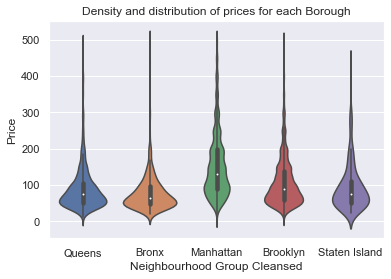

In [27]:
# There are some extreme values which will need to be removed in order to achieve a better visualization
#creating a sub-dataframe with no extreme values / less than 500
sns.set()
sub_airbnb = df_airbnb[df_airbnb.Price < 500]

#using violinplot to showcase density and distribtuion of prices 

viz_2=sns.violinplot(data=sub_airbnb, x='Neighbourhood Group Cleansed', y='Price')
viz_2.set_title('Density and distribution of prices for each Borough')

In [28]:
df_airbnb['Neighbourhood Group Cleansed'].value_counts()

Manhattan        18970
Brooklyn         16691
Queens            3772
Bronx              647
Staten Island      257
Name: Neighbourhood Group Cleansed, dtype: int64

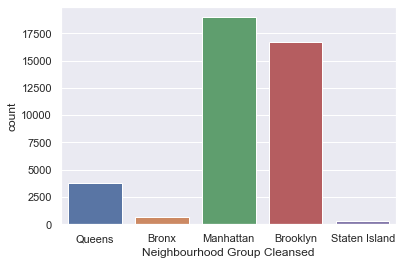

In [29]:
# We can go one step further and see the distribution of listings in new york. A histogram should do the trick.
ax = sns.countplot(x="Neighbourhood Group Cleansed", data=df_airbnb)


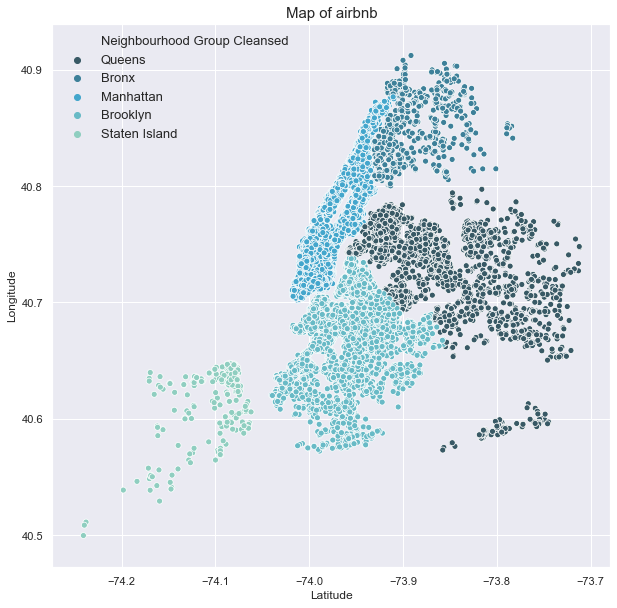

In [30]:
# And that is how it looks plotted. 
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_airbnb, x='Longitude', y='Latitude', hue='Neighbourhood Group Cleansed', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

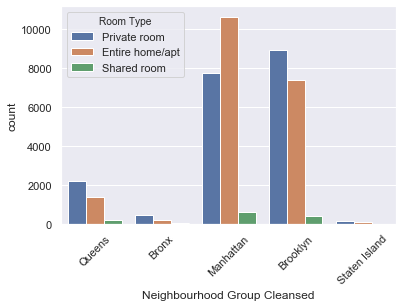

In [31]:
# Let's look at how the listings are distributed. IE. room type per borough
sns.countplot(x="Neighbourhood Group Cleansed", hue="Room Type",data = df_airbnb)
plt.xticks(rotation=45)
plt.show()

In [32]:
df_airbnb['Room Type'].value_counts()

Entire home/apt    19684
Private room       19469
Shared room         1184
Name: Room Type, dtype: int64

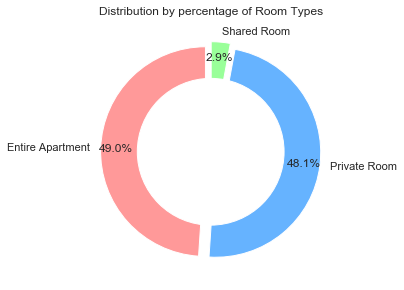

In [33]:
# So what is the percentage apartments vs shared rooms vs private rooms?
import matplotlib.pyplot as plt
# Pie chart
labels = ['Entire Apartment', 'Private Room', 'Shared Room']
sizes = [19848, 19509, 1187]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
 
plt.tight_layout()
plt.title("Distribution by percentage of Room Types")
plt.show()

No handles with labels found to put in legend.


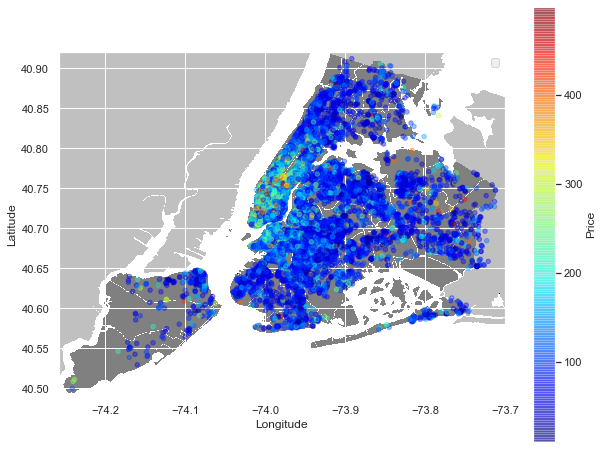

In [34]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img = plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
sub_airbnb = df_airbnb[df_airbnb.Price < 500] 
sub_airbnb.plot(kind='scatter', x='Longitude', y='Latitude', c='Price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(df_airbnb, df_airbnb["Neighbourhood Group Cleansed"]):
    strat_train_set = df_airbnb.loc[train_index]
    strat_test_set = df_airbnb.loc[test_index]

/Users/_bogz_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/Users/_bogz_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [36]:
strat_test_set

ID                                               Name  \
14873   2061811.0                      Great NYC Location for AUGUST   
25899  14967994.0              Seaview Studio in  Brooklyn New york.   
2410   10755415.0                        Harlem Bed and BYOBreakfast   
36764   2338082.0                        Great Master Bedroom in UWS   
6050    9791827.0                EXTRA LARGE ROOM-25min to Manhattan   
53      6232720.0                  Perfect location in Midtown East!   
38477   9196572.0                       One-bedroom apartment in UES   
29403  13295693.0            Cozy private room in Homecrest Brooklyn   
35276   8522756.0                   In the heart of the East Village   
7198   14038649.0                       Namaste-Top Bunk, Quiet Cool   
13956   4233006.0  Private Princess Suite w Office. Long Term Mon...   
8726    4663804.0                  Cozy Room by CentralPark-Times Sq   
33343  14625676.0  Sunny and Spacious Oasis in Bklyn (it's a Dupl...   
32142   1245624.0                   Spacious Airy Brownstone Retreat   
6533   10706850.0                              Sunny Brooklyn Studio   
645     8628860.0    Modern Spacious Apartment Convenient To Transit   
26757  15265988.0        Spacious One Bedroom Apt in Carroll Gardens   
28942  13377443.0              Big, airy room in beautiful apartment   
11423   6822535.0                Sunny Apt Overlooking Prospect Park   
35266   5881858.0                Newly renovated 1 bedroom apartment   
7277    9756258.0                    Room for Female-Upper West Side   
9452    9678327.0                      Bright Williamsburg Apartment   
25671    471845.0                 Gorgeous Summer Duplex/Yard sublet   
14892    339456.0                  Luxury new light filled apartment   
22955  15966060.0    The East Harlem El barrio experience awaits !!!   
5034   17902368.0         Private room in midtown - shared with host   
4233    5218111.0                            Big, Open Red Hook Loft   
29616   3292224.0                Beautiful West Village, River Views   
15498   6520350.0    The Kook House  - Rockaways BEST Summer House!!   
36794  16439003.0  Cozy room Bushwick (private access)| Stanza ca...   
...           ...                                                ...   
4507    5041891.0                 Historic Upper West Side Townhouse   
27069  14042437.0                     Corona, NY 30 minutes from NYC   
584    11069291.0                A quiet and cozy home for travelers   
14092  15066527.0                                   FullSizebed60.00   
32977   1914363.0                       Spacious 1BR Apt In Lefferts   
26928   7734176.0                        Spacious two bedroom in NYC   
33739  17015287.0       Room with taste near jfk/ La Guardia airport   
14939   3915042.0                  Murray Hill / Midtown East Studio   
32332   4817208.0                      Perfect private studio in NYC   
15781  16468083.0    MODERN BEDROOM IN BROOKLYN! BUSHWICK! FUN AREA!   
16736  10270377.0                   Cozy Bedroom in Apartment Uptown   
11421   9050105.0                  Prospect Park 3 bedroom, Sleeps 8   
30870  15866496.0     Large Room w Private Backyard, 20 mins to City   
4240    3474011.0                 Spacious Prewar Apartment Backyard   
24573   1484031.0                Private room in cozy Harlem, NY Apt   
38586  15043817.0                        Private room in Sunnyside 1   
29999    940046.0                 Quiet private room in Gorgeous Apt   
17612   7279657.0                  1 Bdr. Apt. in Ridgewood/Bushwick   
27473  17954908.0        Charming Private Bedroom in Upper East Side   
3056   13078409.0   HOME AWY FRM HOME 2BR (2/3/A/D/B/C/4/5/6 Trains)   
20139   6145263.0                  Central Park Views, Large One Bed   
2493   15800258.0                                    Quiet Homestead   
30208  17450633.0        SUNNY AND COZY ROOM 25 MINUTES TO MANHATTAN   
32252  15931762.0       Vacation Music Studio + 1Bedroo

No handles with labels found to put in legend.


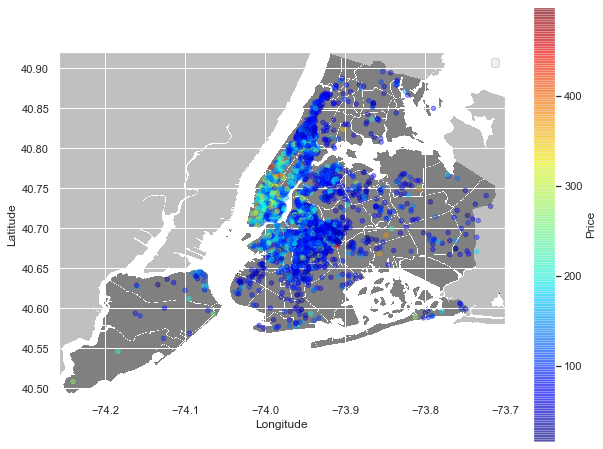

In [37]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img = plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
sub_airbnb = strat_test_set[strat_test_set.Price < 500] 
sub_airbnb.plot(kind='scatter', x='Longitude', y='Latitude', c='Price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [38]:
pd.set_option('display.max_columns', 500)
df_airbnb.head()

ID                                               Name   Latitude  \
0    633276                Jacuzzi Suite, minutes to Times Sq.  40.746086   
1  17285980  Private 1br in quiet Long Island City neighbor...  40.734965   
2  17938814    Beautiful spacious one bedroom, upper east side  40.746234   
3  12762161                 Garden PentHouse 8Min to Manhattan  40.753186   
4   9759331                 2BD located 1 stop from Manhattan!  40.747142   

   Longitude  Price  Security Deposit  Cleaning Fee  Host Response Time  \
0 -73.946906  108.0             400.0          49.0  within a few hours   
1 -73.935211   80.0             300.0          15.0        within a day   
2 -73.956953  115.0               0.0           0.0      within an hour   
3 -73.933830  395.0             500.0         150.0        within a day   
4 -73.950003   55.0             100.0          40.0       not specified   

   Host Response Rate  Host Total Listings Count Neighbourhood Cleansed  \
0               100.0                        2.0       Long Island City   
1                80.0                        1.0       Long Island City   
2               100.0                        1.0       Long Island City   
3                90.0                        1.0       Long Island City   
4                 0.0                        1.0       Long Island City   

  Neighbourhood Group Cleansed Property Type        Room Type  Accommodates  \
0                       Queens         House     Private room           2.0   
1                       Queens     Apartment  Entire home/apt           3.0   
2                       Queens     Apartment  Entire home/apt           3.0   
3                       Queens     Apartment  Entire home/apt          12.0   
4                       Queens     Apartment     Private room           2.0   

   Bathrooms  Bedrooms  Beds  \
0        1.0       1.0   1.0   
1        1.0       1.0   1.0   
2        1.0       1.0   2.0   
3        2.0       1.0   5.0   
4        1.0       2.0   2.0   

                                           Amenities  Number of Reviews  \
0  TV,Internet,Wireless Internet,Air conditioning...               89.0   
1  Wireless Internet,Air conditioning,Kitchen,Hea...                1.0   
2  TV,Cable TV,Wireless Internet,Kitchen,Smoking ...                3.0   
3  Internet,Wireless Internet,Air conditioning,Ki...               24.0   
4  TV,Internet,Wireless Internet,Kitchen,Buzzer/w...                1.0   

   Reviews per Month  Review Scores Rating  Review Scores Accuracy  \
0               1.58                  0.94                     1.0   
1               0.38                  0.00                     0.0   
2               3.00                  1.00                     0.9   
3               2.38                  0.92                     1.0   
4               0.06                  1.00                     1.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        0.9                    1.0   
1                        0.0                    0.0   
2                        0.9                    0.9   
3                        1.0                    0.9   
4                        1.0                    1.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  
0                          1.0                     0.9                  0.9  
1                          0.0                     0.0                  0.0  
2                          0.9                     1.0                  1.0  
3                          1.0                     0.9                  0.9  
4                          1.0                     1.0                  1.0

In [39]:
df_airbnb['Neighbourhood Group Cleansed'].value_counts()

Manhattan        18970
Brooklyn         16691
Queens            3772
Bronx              647
Staten Island      257
Name: Neighbourhood Group Cleansed, dtype: int64

##### Step 3: Working on the current dataset...

One-hot-encoding items

In [40]:
# one hot encoding the room type

dfDummies = pd.get_dummies(df_airbnb['Room Type'], prefix = 'rt')
df_airbnb = pd.concat([df_airbnb, dfDummies], axis=1)

# Dropping the room type column

df_airbnb.drop(['Room Type'], axis=1, inplace=True)

In [41]:
# one hot encoding the borough

dfDummies = pd.get_dummies(df_airbnb['Neighbourhood Group Cleansed'], prefix = 'bg')
df_airbnb = pd.concat([df_airbnb, dfDummies], axis=1)

In [42]:
# Appending Crime and wages. Might be the case that they will be removed at the end...

# Function to compute return crime rate (per 1000 people) per borough
def cr_ret(borough):
    if borough == 'Bronx':
        return 69.05
    elif borough == 'Brooklyn':
        return 51.76
    elif borough == 'Manhattan':
        return 68.64
    elif borough == 'Queens':
        return 38.60
    return 42.74

# Function to compute the average income
def in_ret(borough):
    if borough == 'Bronx':
        return 35564
    elif borough == 'Brooklyn':
        return 48758
    elif borough == 'Manhattan':
        return 175960
    elif borough == 'Queens':
        return 46829
    return 54908

df_airbnb['crime'] = df_airbnb['Neighbourhood Group Cleansed'].apply(cr_ret)
df_airbnb['income'] = df_airbnb['Neighbourhood Group Cleansed'].apply(in_ret)

In [43]:
# one hot encoding the host response time

dfDummies = pd.get_dummies(df_airbnb['Host Response Time'], prefix = 'h')
df_airbnb = pd.concat([df_airbnb, dfDummies], axis=1)

# Dropping the room type column

df_airbnb.drop(['Host Response Time'], axis=1, inplace=True)

In [44]:
df_airbnb.head(1)

ID                                 Name   Latitude  Longitude  Price  \
0  633276  Jacuzzi Suite, minutes to Times Sq.  40.746086 -73.946906  108.0   

   Security Deposit  Cleaning Fee  Host Response Rate  \
0             400.0          49.0               100.0   

   Host Total Listings Count Neighbourhood Cleansed  \
0                        2.0       Long Island City   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   

   Bedrooms  Beds                                          Amenities  \
0       1.0   1.0  TV,Internet,Wireless Internet,Air conditioning...   

   Number of Reviews  Reviews per Month  Review Scores Rating  \
0               89.0               1.58                  0.94   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                     1.0                        0.9                    1.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                          1.0                     0.9                  0.9   

   rt_Entire home/apt  rt_Private room  rt_Shared room  bg_Bronx  bg_Brooklyn  \
0                   0                1               0         0            0   

   bg_Manhattan  bg_Queens  bg_Staten Island  crime  income  \
0             0          1                 0   38.6   46829   

   h_a few days or more  h_not specified  h_within a day  \
0                     0                0               0   

   h_within a few hours  h_within an hour  
0                     1                 0

In [39]:
# one hot encoding the neighbourhood

dfDummies = pd.get_dummies(df_airbnb['Neighbourhood Cleansed'], prefix = 'h')
df_airbnb = pd.concat([df_airbnb, dfDummies], axis=1)

In [45]:
# Dropping the neighbourhood

df_airbnb.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

In [46]:
# saving the dataset for later use

df_airbnb.to_csv('../Data/dataset_cleaned_first.csv', sep=',' , index = None, header=True)